In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('diabetes.csv')
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
dataframe.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values in a dataset

In [5]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Data Imputation of 0's in every feature

size of the dataset 


In [7]:
dataframe.shape


(768, 9)

.Target Column: Outcome[0,1] (Binary classification Task)

.As the target column is available in the dataset,supervised machine learning algorithm.

.Records: 768

In [8]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


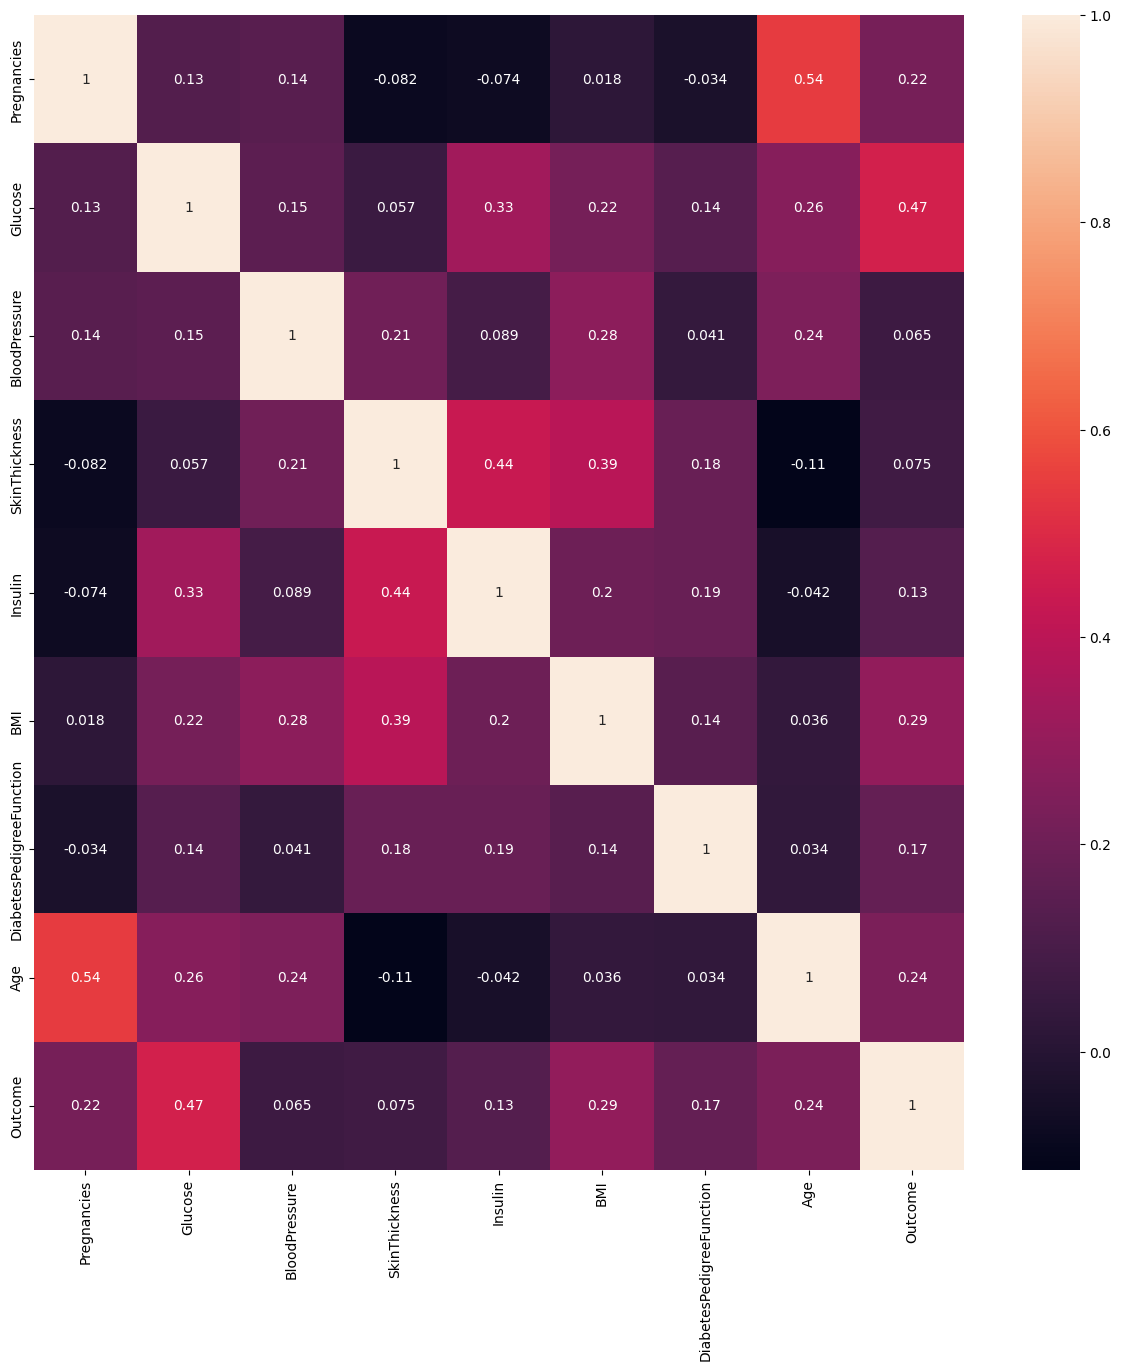

In [9]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(dataframe.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

Descriptive Statistics of the given data

In [10]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Imputation

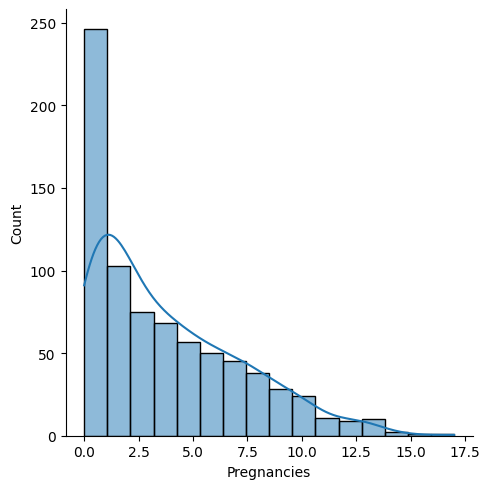

In [11]:
#Pregnancies
sns.displot(dataframe.Pregnancies, kde=True) 

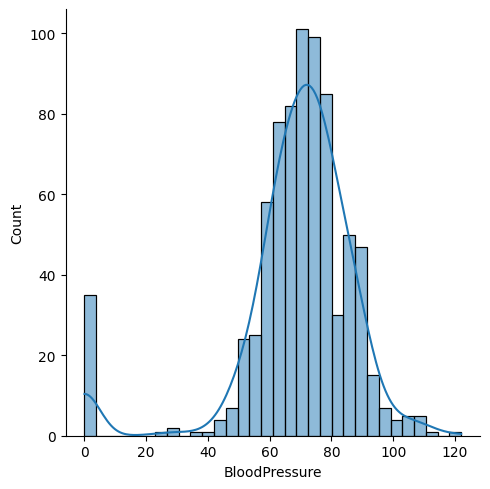

In [12]:
#BloodPressure
sns.displot(dataframe.BloodPressure, kde=True)

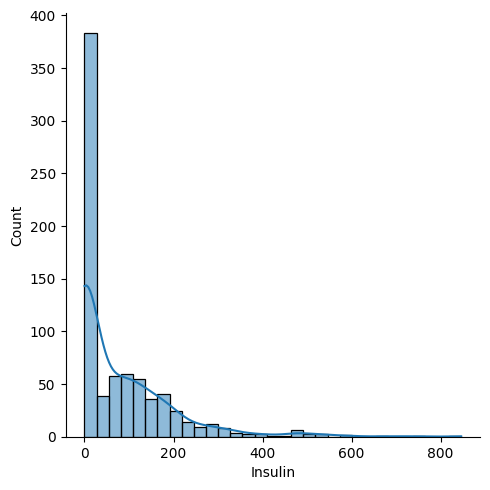

In [13]:
#Insulin
sns.displot(dataframe.Insulin, kde=True)

In [14]:
## Insulun -> Right Skewed distribution
dataframe['Insulin'] = dataframe['Insulin'].replace(0, dataframe['Insulin'].median())
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0, dataframe['Pregnancies'].median())
dataframe['Glucose'] = dataframe['Glucose'].replace(0, dataframe['Glucose'].mean())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, dataframe['BloodPressure'].mean())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0, dataframe['SkinThickness'].median())
dataframe['BMI'] = dataframe['BMI'].replace(0, dataframe['BMI'].mean())
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0, dataframe['DiabetesPedigreeFunction'].median())
dataframe['Age'] = dataframe['Age'].replace(0, dataframe['Age'].median())

In [15]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


Descriptive Statistics
Correlation Coefficient and its significance
Types of Distribution ans it's significance
Median is more robusts to Outliers and Why
Data Imputation via Mean and Median(Numeric Data) => Symmetric -> Mean and Skewed -> Median,Categorical Data => Mode 

In [17]:
## x -> Input Features
X = dataframe.drop('Outcome', axis=1)
y= dataframe['Outcome']

Outlier Detection -> Box Plot

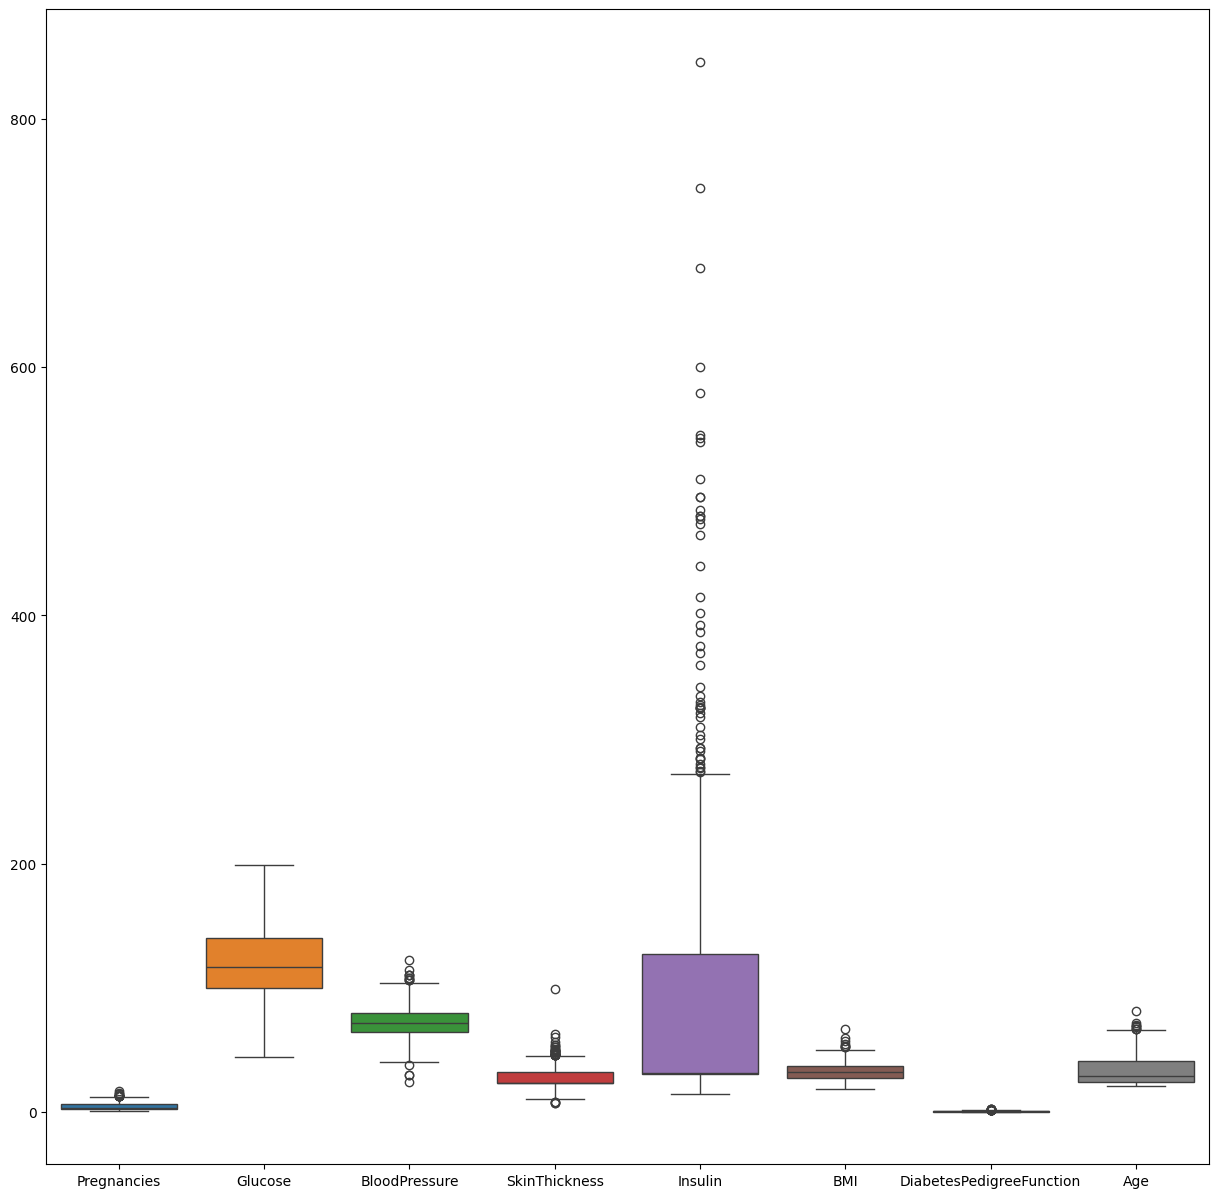

In [18]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=X,ax=ax)
plt.savefig('boxplot.jpg')


In [19]:
X.shape

(768, 8)

In [22]:
mask = pd.Series(True, index=X.index)  # Start with all rows included

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [28]:
mask

0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Name: Age, Length: 768, dtype: bool

In [42]:
X_outliers_detection = X[mask]
y_outliers_detection = y[mask]

In [41]:
X_outliers_detection.shape

(759, 8)

Standardization

Standard Normal Form -> Mean = 0 and standard deviation = 1

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outliers_detection)



In [53]:
X_scaled = pd.DataFrame(X_scaled,columns=cols)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


Approach 2 of quantiles to remove the outliers

Handling of Imbalanced data


In [54]:
y_outliers_detection.value_counts()

0    493
1    266
Name: Outcome, dtype: int64

Detecting of the outliers

Normalization via StandardScaler Form & Why it is important(reduce the  biasness  in the model)

In [46]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [47]:
type(X_scaled)

pandas.core.frame.DataFrame

In [55]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


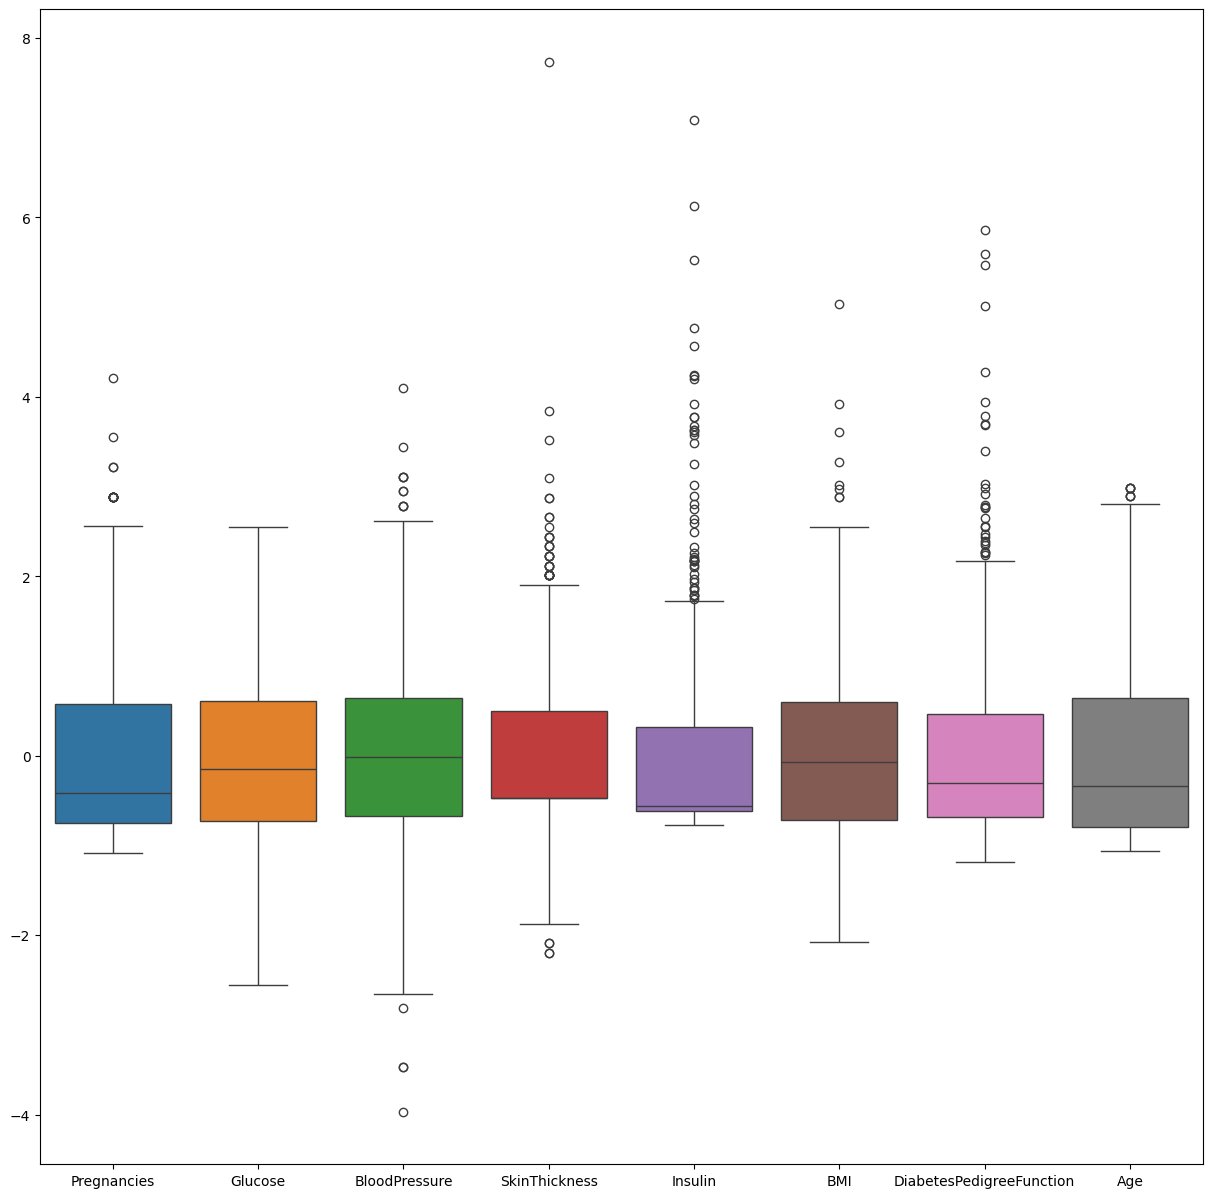

In [56]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scaled,ax=ax)
plt.savefig('boxplot.jpg')


In [62]:
X_scaled.reset_index(drop=True, inplace=True)
y_outliers_detection.reset_index(drop=True, inplace=True)

In [63]:
q=X_scaled['Insulin'].quantile(0.95)
mask = X_scaled['Insulin'] < q
dataNew = X_scaled[mask]
y_outlier_detection = y_outliers_detection[mask]

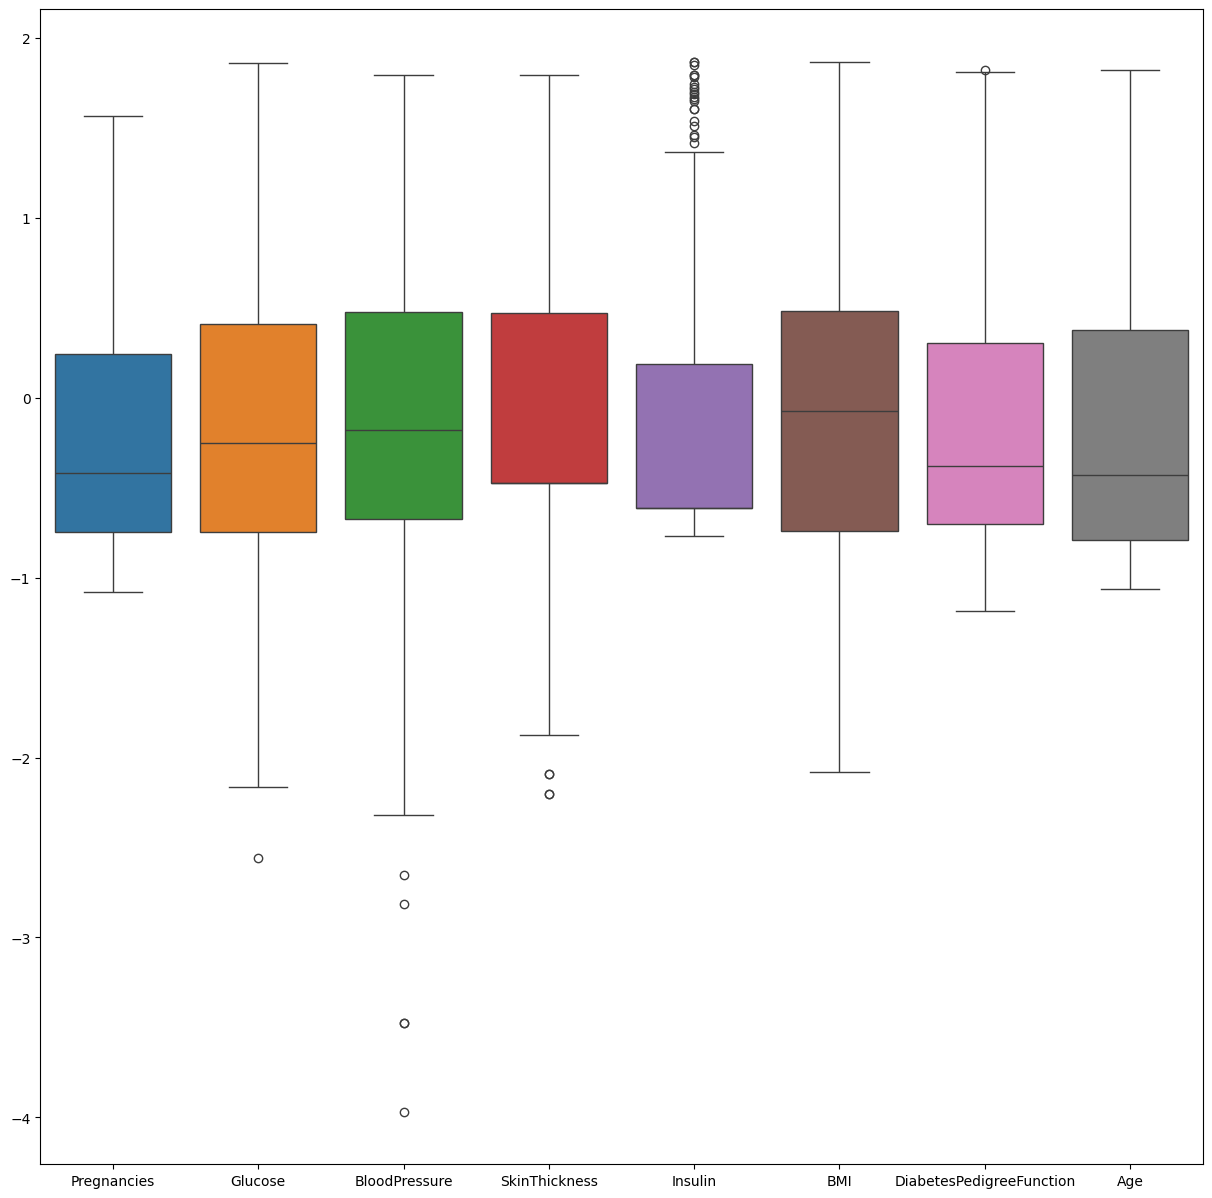

In [59]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=dataNew,ax=ax)
plt.savefig('boxplot.jpg')


Training The Model 

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataNew, y_outlier_detection, test_size=0.33, random_state=42)

In [65]:
X_train.shape

(483, 8)

In [66]:
X_test.shape

(238, 8)

Data Imbalancing

OverSampling:Minority Class and increase that number to the majority class

UnderSampling : Majority class and decrease that  number to the minority class

SMOTE:Synthetic data and increase the number of samples to the majority class

In [67]:
y_train.value_counts()

0    318
1    165
Name: Outcome, dtype: int64

SMOTE Technique

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [70]:
print("\nResampled class distribution: ")
print(pd.Series(y_train).value_counts())


Resampled class distribution: 
0    318
1    318
Name: Outcome, dtype: int64


In [71]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train, y_train)

LogisticRegression()

Model Prediction

In [72]:
y_predictions = classification.predict(X_test)
print(y_predictions)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


Model Evaluation

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.7478991596638656

Healthcare: Recall is very important metric

In [75]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_predictions, target_names=target_names))


              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



Saving the Model


In [76]:
import pickle 
pickle.dump(classification, open('classification_model.pkl', 'wb'))

In [77]:
classification_model = pickle.load(open('classification_model.pkl', 'rb'))
classification_model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)